In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
from fractions import Fraction


In [2]:
trajectories = np.load('data/trajectories.npy')
x_arr = np.load('data/x_arr.npy')
psi_WKB = np.load('data/psi_WKB.npy')
psi_WKB_analytical = np.load('data/psi_WKB_analytical.npy')
psi_QM = np.load('data/psi_QM.npy')

In [2]:
def simplify_fraction(numerator, denominator):
    """ Simplify the fraction and return as a string. """
    frac = Fraction(numerator, denominator).limit_denominator()
    if frac.denominator == 1:  # If the denominator is 1, return only the numerator
        return str(frac.numerator)
    else:
        return fr"\frac{{{frac.numerator}}}{{{frac.denominator}}}"

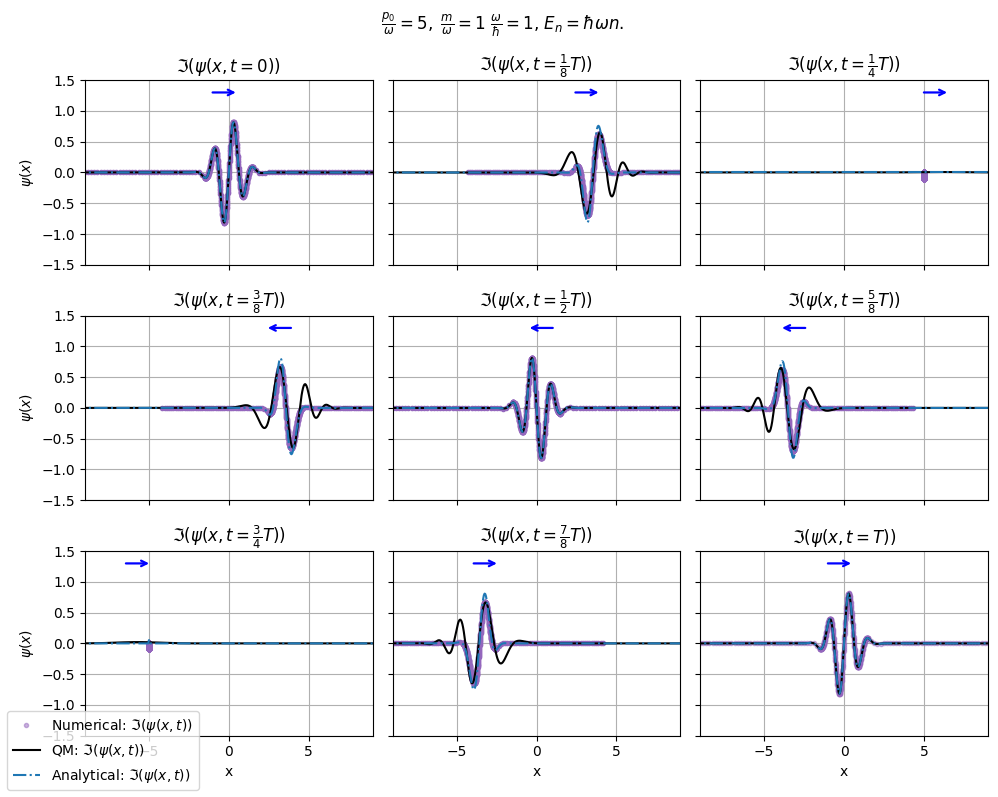

In [4]:
fig = plt.figure(figsize=(10,8))
axes = [fig.add_subplot(3, 3, i+1) for i in range(9)]
t_points = np.array([0,0.74,1.2,1.5,2.3,2.86,3.7,4.51,5])/0.01
t_points = np.array([0.75*i for i in range(9)])/0.01
t_points = np.array([2*np.pi/8*i for i in range(9)])/0.01
for i in range(len(axes)-1):
    ax = axes[i]
    t = int(t_points[i])
    ax.set_ylabel(r'$\psi(x)$')
    ax.set_xlabel("x")
    ax.plot(trajectories[:,t], np.imag(psi_WKB[t,:]),  '.', color ='tab:purple')
    ax.plot(x_arr, np.imag(psi_QM[:,t]), linestyle = 'solid', color ='k')
    ax.plot(x_arr, np.imag(psi_WKB_analytical[:,t]),linestyle = 'dashdot',color = 'tab:blue')
    ax.grid()
    if i ==0:
        ax.set_title(r'$\Im(\psi(x,t=0))$')
    else:
        ax.set_title(r'$\Im(\psi(x,t=' + f"{simplify_fraction(i, 8)}" + r'T))$')
    #ax.legend()
    ax.set_ylim(-1.5,1.5)
    ax.set_xlim(-9,9)
    ax.label_outer()
    main_feature = x_arr[np.argmax(abs(np.imag(psi_QM[:,t])))]
    arrow_start = (-.9+main_feature,1.3)  
    arrow_end = (.9+main_feature,1.3)
    if i >=3 and i <6: 
        ax.annotate('', xy=arrow_start, xytext=arrow_end,
                arrowprops=dict(arrowstyle="->", color='blue', lw=1.6))
    else:
        ax.annotate('', xy=arrow_end, xytext=arrow_start,
                arrowprops=dict(arrowstyle="->", color='blue', lw=1.6))
    
        

ax = axes[-1]
t = int(t_points[-1])
ax.set_ylabel(r'$\psi(x)$')
ax.set_xlabel("x")
ax.plot(trajectories[:,t], np.imag(psi_WKB[t,:]),  '.', label = r'Numerical: $\Im(\psi(x,t))$', color ='tab:purple',alpha=0.5)
ax.plot(x_arr, np.imag(psi_QM[:,t]), label = r'QM: $\Im(\psi(x,t))$',linestyle = 'solid', color ='k')
ax.plot(x_arr, np.imag(psi_WKB_analytical[:,t]), label = r'Analytical: $\Im(\psi(x,t))$',linestyle = 'dashdot',color = 'tab:blue')
ax.grid()
#ax.legend()
ax.set_ylim(-1.5,1.5)
ax.set_xlim(-9,9)
ax.set_title(r'$\Im(\psi(x,t=T))$')
ax.label_outer()
main_feature = x_arr[np.argmax(abs(np.imag(psi_QM[:,t])))]
arrow_start = (-.9+main_feature,1.3)  
arrow_end = (.9+main_feature,1.3)  
ax.annotate('', xy=arrow_end, xytext=arrow_start,
                arrowprops=dict(arrowstyle="->", color='blue', lw=1.6,label='Direction of Movement'))

fig.legend( loc='lower left')
fig.suptitle(r'$\frac{p_0}{\omega}=5,$ $\frac{m}{\omega}=1$ $\frac{\omega}{\hbar}=1$, $E_n = \hbar\omega n$.')
plt.tight_layout()

#plt.show()
#plt.savefig("plots/impsi.png")

In [5]:
trajectories = np.load('data/trajectories_CASE1.npy')
psi_WKB_2D = np.load('data/psi_WKB_2D_CASE1.npy')
PSI_QM_2D = np.load('data/PSI_QM_2D_CASE1.npy')
X = np.load('data/X_CASE1.npy')
Y = np.load('data/Y_CASE1.npy')

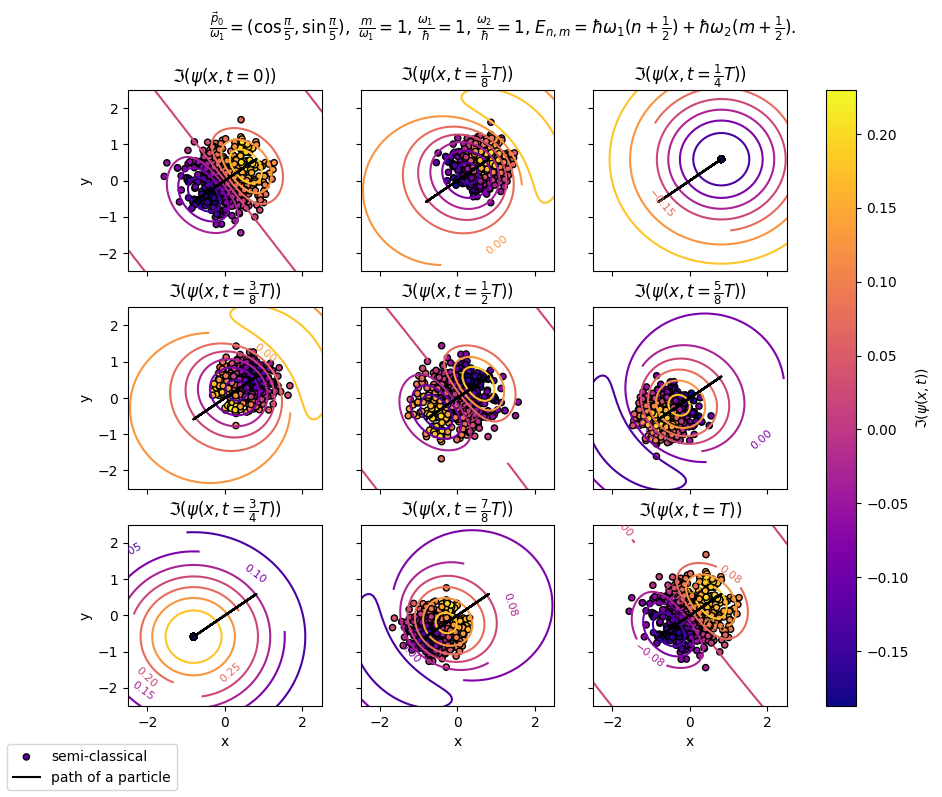

In [6]:
fig = plt.figure(figsize=(10,8))
axes = [fig.add_subplot(3, 3, i+1) for i in range(9)]
t_points = np.array([2*np.pi/8*i for i in range(9)])/0.01
particle = 469
for i in range(len(axes)-1):
    ax = axes[i]
    t = int(t_points[i])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    contour_lines = ax.contour(Y, X, np.imag(PSI_QM_2D[:, :, t]), cmap='plasma')
    plt.clabel(contour_lines, inline=True, fontsize=8)
    subset_indices = range(0, 500, 1)  # Adjust as needed
    z_values = np.imag(psi_WKB_2D[t, subset_indices])  # Z-values for color coding
    scatter = ax.scatter(trajectories[subset_indices, t][:, 0], trajectories[subset_indices, t][:, 1], 
                         c=z_values, cmap='plasma', s=20, edgecolor='k')
    ax.plot(trajectories[particle, :][:, 0],trajectories[particle, :][:, 1], color="k")
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    ax.label_outer()
    if i ==0:
        ax.set_title(r'$\Im(\psi(x,t=0))$')
    else:
        ax.set_title(r'$\Im(\psi(x,t=' + f"{simplify_fraction(i, 8)}" + r'T))$')
ax = axes[-1]
t = int(t_points[-1])
ax.set_xlabel("x")
ax.set_ylabel("y")
contour_lines = ax.contour(Y, X, np.imag(PSI_QM_2D[:, :, t]), cmap='plasma')
plt.clabel(contour_lines, inline=True, fontsize=8)
subset_indices = range(0, 500, 1)  # Adjust as needed
z_values = np.imag(psi_WKB_2D[t, subset_indices])  # Z-values for color coding
scatter = ax.scatter(trajectories[subset_indices, t][:, 0], trajectories[subset_indices, t][:, 1], 
                     c=z_values, cmap='plasma', s=20, edgecolor='k', label="semi-classical")
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.label_outer()
ax.set_title(r'$\Im(\psi(x,t=T))$')
ax.plot(trajectories[particle, :][:, 0],trajectories[particle, :][:, 1], color="k", label="path of a particle")
ax.clabel(contour_lines, inline=True, fontsize=8)
#fig.colorbar( label='Z-value', shrink=0.5)
fig.legend( loc='lower left')
fig.suptitle(r'$\frac{\vec{p}_0}{\omega_1}=(\cos\frac{\pi}{5}, \sin\frac{\pi}{5}),$ $\frac{m}{\omega_1}=1$, $\frac{\omega_1}{\hbar}=1$, $\frac{\omega_2}{\hbar}=1$, $E_{n,m} = \hbar\omega_1 (n+\frac{1}{2})+ \hbar\omega_2 (m+\frac{1}{2})$.')
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.1)
cbar.set_label(r'$\Im(\psi(x,t))$')
plt.savefig("plots/case1.png")

In [7]:
trajectories = np.load('data/trajectories_CASE2.npy')
psi_WKB_2D = np.load('data/psi_WKB_2D_CASE2.npy')
PSI_QM_2D = np.load('data/PSI_QM_2D_CASE2.npy')
X = np.load('data/X_CASE2.npy')
Y = np.load('data/Y_CASE2.npy')

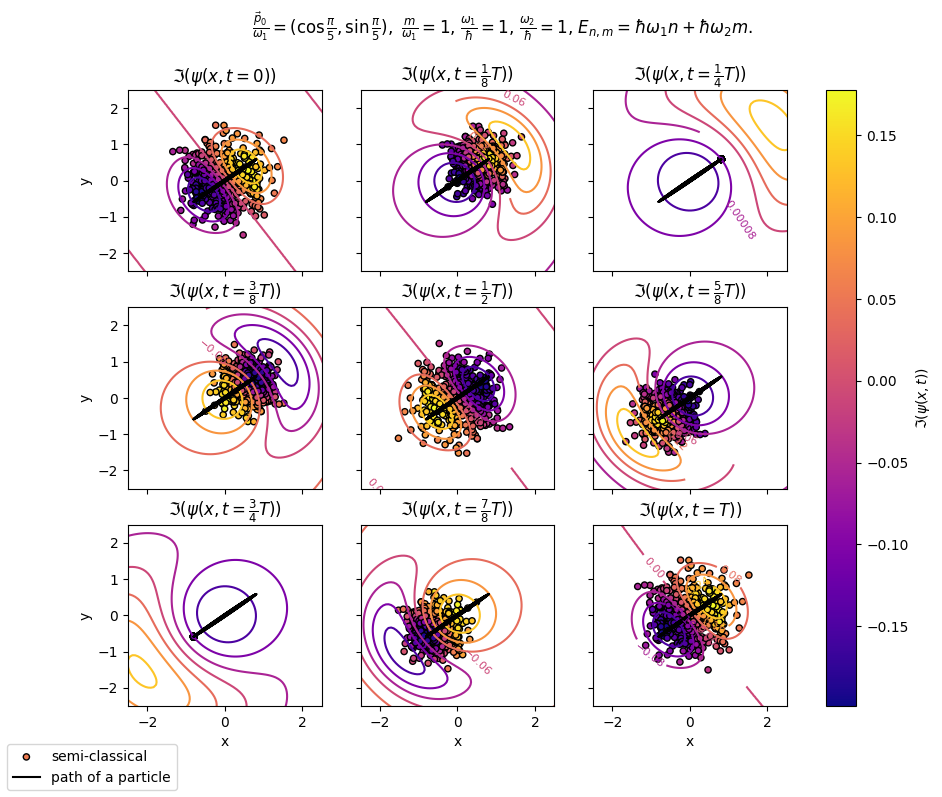

In [8]:
particle = 67
fig = plt.figure(figsize=(10,8))
axes = [fig.add_subplot(3, 3, i+1) for i in range(9)]
t_points = np.array([2*np.pi/8*i for i in range(9)])/0.01
for i in range(len(axes)-1):
    ax = axes[i]
    t = int(t_points[i])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    contour_lines = ax.contour(Y, X, np.imag(PSI_QM_2D[:, :, t]), cmap='plasma')
    plt.clabel(contour_lines, inline=True, fontsize=8)
    subset_indices = range(0, 500, 1)  # Adjust as needed
    z_values = np.imag(psi_WKB_2D[t, subset_indices])  # Z-values for color coding
    scatter = ax.scatter(trajectories[subset_indices, t][:, 0], trajectories[subset_indices, t][:, 1], 
                         c=z_values, cmap='plasma', s=20, edgecolor='k')
    ax.plot(trajectories[particle, :][:, 0],trajectories[particle, :][:, 1], color="k")
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    ax.label_outer()
    if i ==0:
        ax.set_title(r'$\Im(\psi(x,t=0))$')
    else:
        ax.set_title(r'$\Im(\psi(x,t=' + f"{simplify_fraction(i, 8)}" + r'T))$')
ax = axes[-1]
t = int(t_points[-1])
ax.set_xlabel("x")
ax.set_ylabel("y")
contour_lines = ax.contour(Y, X, np.imag(PSI_QM_2D[:, :, t]), cmap='plasma')
plt.clabel(contour_lines, inline=True, fontsize=8)
subset_indices = range(0, 500, 1)  # Adjust as needed
z_values = np.imag(psi_WKB_2D[t, subset_indices])  # Z-values for color coding
scatter = ax.scatter(trajectories[subset_indices, t][:, 0], trajectories[subset_indices, t][:, 1], 
                     c=z_values, cmap='plasma', s=20, edgecolor='k', label="semi-classical")
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.label_outer()
ax.set_title(r'$\Im(\psi(x,t=T))$')
ax.plot(trajectories[particle, :][:, 0],trajectories[particle, :][:, 1], color="k", label="path of a particle")
ax.clabel(contour_lines, inline=True, fontsize=8)
#fig.colorbar( label='Z-value', shrink=0.5)
fig.legend( loc='lower left')
fig.suptitle(r'$\frac{\vec{p}_0}{\omega_1}=(\cos\frac{\pi}{5}, \sin\frac{\pi}{5}),$ $\frac{m}{\omega_1}=1$, $\frac{\omega_1}{\hbar}=1$, $\frac{\omega_2}{\hbar}=1$, $E_{n,m} = \hbar\omega_1 n+ \hbar\omega_2 m$.')
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.1)
cbar.set_label(r'$\Im(\psi(x,t))$')
plt.savefig("plots/case2.png")

In [13]:
trajectories = np.load('data/trajectories_CASE3.npy')
psi_WKB_2D = np.load('data/psi_WKB_2D_CASE3.npy')
PSI_QM_2D = np.load('data/PSI_QM_2D_CASE3.npy')
X = np.load('data/X_CASE3.npy')
Y = np.load('data/Y_CASE3.npy')

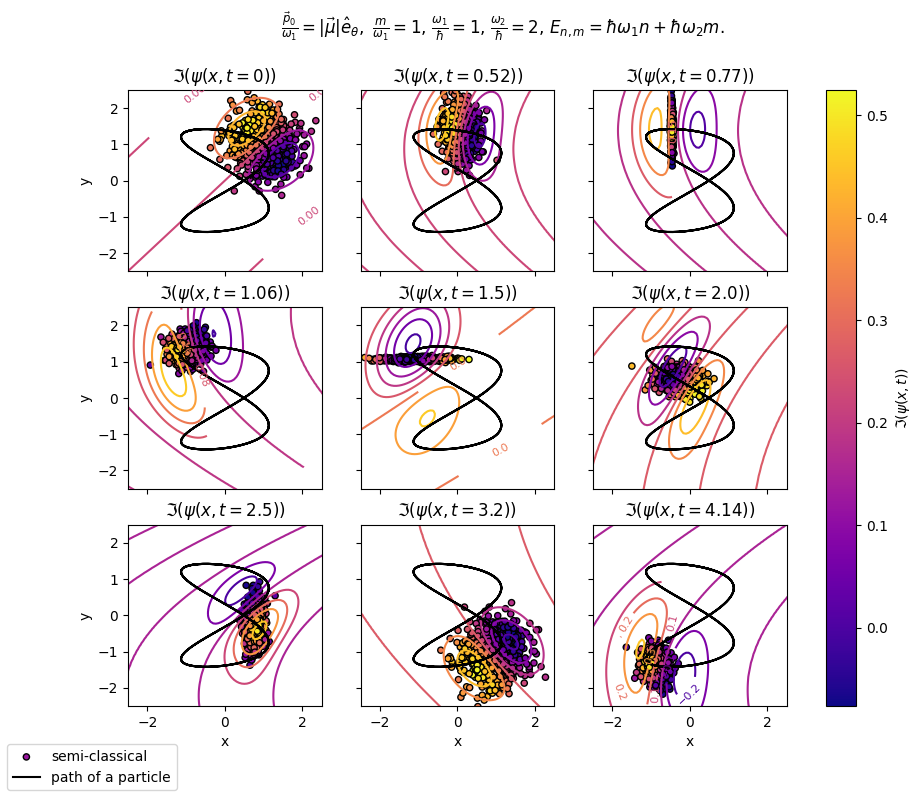

In [14]:
particle = 259
fig = plt.figure(figsize=(10,8))
axes = [fig.add_subplot(3, 3, i+1) for i in range(9)]
t_points = np.array([2*np.pi/8*i for i in range(9)])/0.01
t_points = np.array([0, 52, 77, 106, 150, 200, 250, 320, 414])
for i in range(len(axes)-1):
    ax = axes[i]
    t = int(t_points[i])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    contour_lines = ax.contour(Y, X, np.imag(PSI_QM_2D[:, :, t]), cmap='plasma')
    plt.clabel(contour_lines, inline=True, fontsize=8)
    subset_indices = range(0, 500, 1)  # Adjust as needed
    z_values = np.imag(psi_WKB_2D[t, subset_indices])  # Z-values for color coding
    scatter = ax.scatter(trajectories[subset_indices, t][:, 0], trajectories[subset_indices, t][:, 1], 
                         c=z_values, cmap='plasma', s=20, edgecolor='k')
    ax.plot(trajectories[particle, :][:, 0],trajectories[particle, :][:, 1], color="k")
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    ax.label_outer()
    if i ==0:
        ax.set_title(r'$\Im(\psi(x,t=0))$')
    else:
        ax.set_title(r'$\Im(\psi(x,t=' + f"{np.round(t*0.01, 2)}" + r'))$')
ax = axes[-1]
t = int(t_points[-1])
ax.set_xlabel("x")
ax.set_ylabel("y")
contour_lines = ax.contour(Y, X, np.imag(PSI_QM_2D[:, :, t]), cmap='plasma')
plt.clabel(contour_lines, inline=True, fontsize=8)
subset_indices = range(0, 500, 1)  # Adjust as needed
z_values = np.imag(psi_WKB_2D[t, subset_indices])  # Z-values for color coding
scatter = ax.scatter(trajectories[subset_indices, t][:, 0], trajectories[subset_indices, t][:, 1], 
                     c=z_values, cmap='plasma', s=20, edgecolor='k', label="semi-classical")
ax.plot(trajectories[particle, :][:, 0],trajectories[particle, :][:, 1], color="k", label="path of a particle")
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.label_outer()
ax.set_title(r'$\Im(\psi(x,t=' + f"{np.round(t*0.01, 2)}" + r'))$')
ax.clabel(contour_lines, inline=True, fontsize=8)
#fig.colorbar( label='Z-value', shrink=0.5)
fig.legend( loc='lower left')
fig.suptitle(r'$\frac{\vec{p}_0}{\omega_1}=|\vec{\mu}|\hat{e}_\theta,$ $\frac{m}{\omega_1}=1$, $\frac{\omega_1}{\hbar}=1$, $\frac{\omega_2}{\hbar}=2$, $E_{n,m} = \hbar\omega_1 n+ \hbar\omega_2 m$.')
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.1)
cbar.set_label(r'$\Im(\psi(x,t))$')
plt.savefig("plots/case3.png")

In [11]:
trajectories = np.load('data/trajectories_CASE4.npy')
psi_WKB_2D = np.load('data/psi_WKB_2D_CASE4.npy')
PSI_QM_2D = np.load('data/PSI_QM_2D_CASE4.npy')
X = np.load('data/X_CASE4.npy')
Y = np.load('data/Y_CASE4.npy')

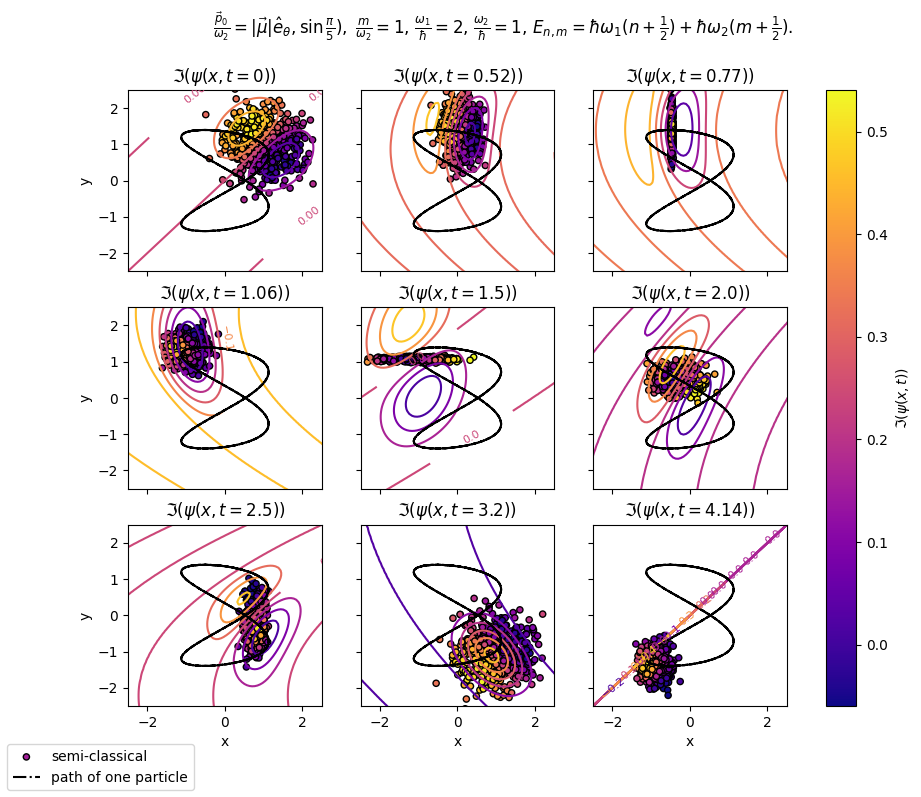

In [12]:
particle = 255
fig = plt.figure(figsize=(10,8))
axes = [fig.add_subplot(3, 3, i+1) for i in range(9)]
t_points = np.array([2*np.pi/16*i for i in range(9)])/0.01
t_points = np.array([0, 52, 77, 106, 150, 200, 250, 320, 414])
for i in range(len(axes)-1):
    ax = axes[i]
    t = int(t_points[i])
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    contour_lines = ax.contour(Y, X, np.imag(PSI_QM_2D[:, :, t]), cmap='plasma')
    plt.clabel(contour_lines, inline=True, fontsize=8)
    subset_indices = range(0, 500, 1)  # Adjust as needed
    z_values = np.imag(psi_WKB_2D[t, subset_indices])  # Z-values for color coding
    scatter = ax.scatter(trajectories[subset_indices, t][:, 0], trajectories[subset_indices, t][:, 1], 
                         c=z_values, cmap='plasma', s=20, edgecolor='k')
    ax.plot(trajectories[particle, :][:, 0],trajectories[particle, :][:, 1], color="k",linestyle = 'dashdot')
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)
    ax.label_outer()
    if i ==0:
        ax.set_title(r'$\Im(\psi(x,t=0))$')
    else:
        ax.set_title(r'$\Im(\psi(x,t=' + f"{np.round(t*0.01, 2)}" + r'))$')
ax = axes[-1]
t = int(t_points[-1])
ax.set_xlabel("x")
ax.set_ylabel("y")
contour_lines = ax.contour(X, X, np.imag(PSI_QM_2D[:, :, t]), cmap='plasma')
plt.clabel(contour_lines, inline=True, fontsize=8)
subset_indices = range(0, 500, 1)  # Adjust as needed
z_values = np.imag(psi_WKB_2D[t, subset_indices])  # Z-values for color coding
scatter = ax.scatter(trajectories[subset_indices, t][:, 0], trajectories[subset_indices, t][:, 1], 
                     c=z_values, cmap='plasma', s=20, edgecolor='k', label="semi-classical")
ax.plot(trajectories[particle, :][:, 0],trajectories[particle, :][:, 1], color="k",linestyle = 'dashdot', label="path of one particle")
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.label_outer()
ax.set_title(r'$\Im(\psi(x,t=' + f"{np.round(t*0.01, 2)}" + r'))$')
ax.clabel(contour_lines, inline=True, fontsize=8)
#fig.colorbar( label='Z-value', shrink=0.5)
fig.legend( loc='lower left')
fig.suptitle(r'$\frac{\vec{p}_0}{\omega_2}=|\vec{\mu}|\hat{e}_\theta, \sin\frac{\pi}{5}),$ $\frac{m}{\omega_2}=1$, $\frac{\omega_1}{\hbar}=2$, $\frac{\omega_2}{\hbar}=1$, $E_{n,m} = \hbar\omega_1 (n+\frac{1}{2})+ \hbar\omega_2 (m+\frac{1}{2})$.')
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.1)
cbar.set_label(r'$\Im(\psi(x,t))$')
plt.savefig("plots/case4.png")

<IPython.core.display.Javascript object>


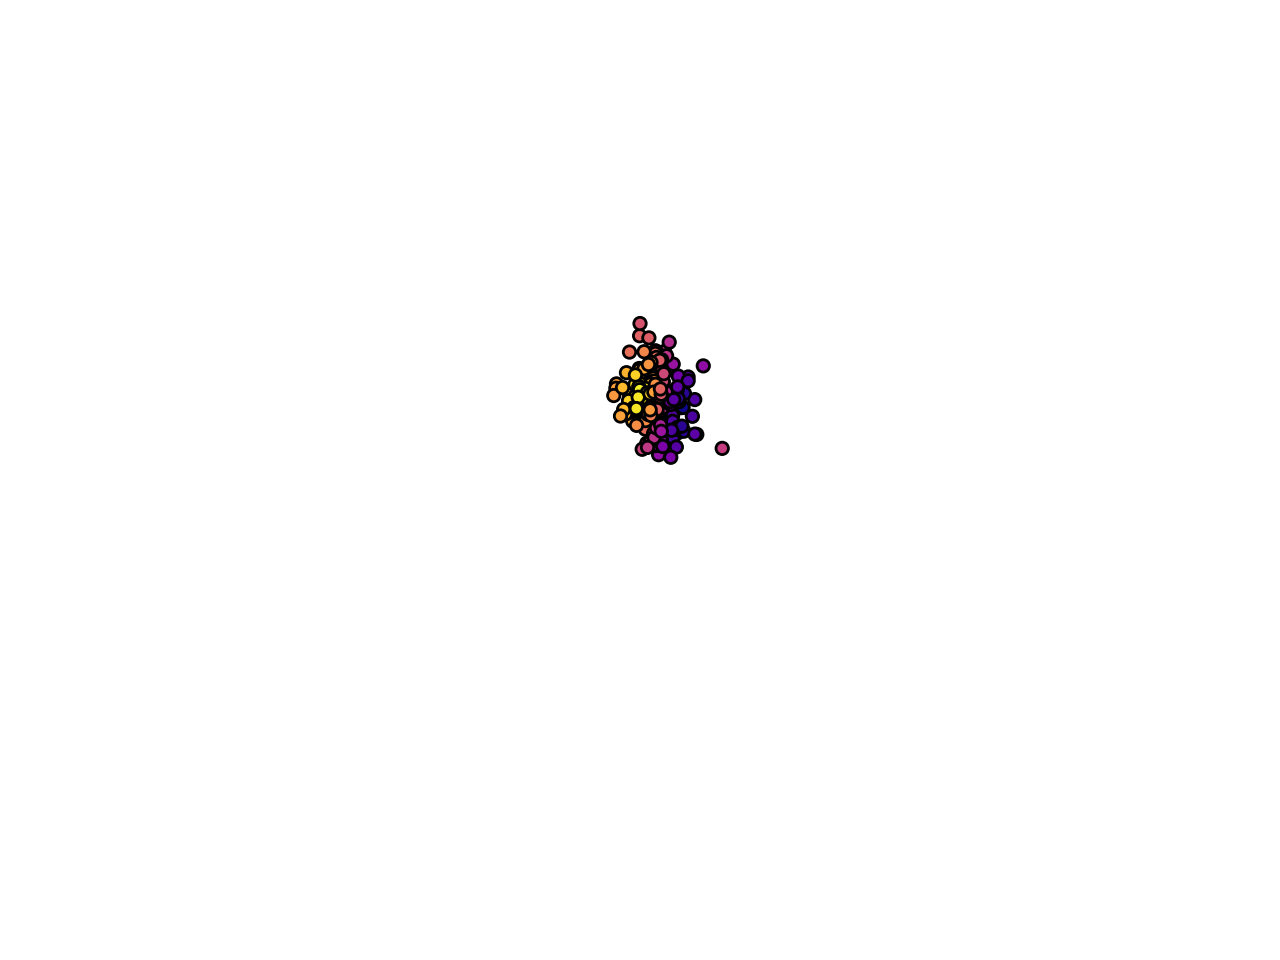

In [15]:
import matplotlib
from scipy.stats import norm
from matplotlib import interactive
from matplotlib.animation import FuncAnimation
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot()

def _forward(x):
    return np.exp(-x**2)
def _inverse(x):
    return np.sqrt(np.log(x))

divnorm = matplotlib.colors.FuncNorm((_forward, _inverse), vmin=.000, vmax=1)

def animate(i):
    ax.clear()
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    # Plotting the contour lines
    contour_lines = ax.contour(Y, X, np.imag(PSI_QM_2D[:, :, i]), cmap='plasma')
    plt.clabel(contour_lines, inline=True, fontsize=8)

    # Plotting scatter points
    subset_indices = range(0, 500, 1)  # Adjust as needed
    z_values = np.imag(psi_WKB_2D[i, subset_indices])
    z_value = np.imag(psi_WKB_2D[i, 1])# Z-values for color coding
    scatter = ax.scatter(trajectories[subset_indices, i][:, 0], trajectories[subset_indices, i][:, 1], 
                         c=z_values, cmap='plasma', s=20, edgecolor='k', label='Trajectory Points')
    particle = 255
    ax.plot(trajectories[particle, :][:, 0],trajectories[particle, :][:, 1], color="k", label="path of a particle")

    # Adding a colorbar for the scatter plot
    #fig.colorbar(scatter, ax=ax, label='Z-value', shrink=0.5)

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)

    # Adding a legend
    ax.legend(loc='upper right')

    # Optionally, setting a title
    ax.set_title(f"Frame {i}")
ani = FuncAnimation(fig, animate, frames=int(20/0.01), interval=0.01, repeat=True)
#fig.colorbar(scatter, ax=ax, label='Z-value', shrink=0.5)

In [17]:
0, 52, 77, 106, 150, 200, 250, 320, 414

(0, 52, 77, 106, 150, 200, 250, 320, 414)

In [18]:
def find_central_particle(trajectories):
    # Calculate the centroid of the initial positions of all particles
    centroid = np.mean(trajectories[:, 0, :], axis=0)

    # Calculate the distance of each particle's initial position from the centroid
    distances = np.linalg.norm(trajectories[:, 0, :] - centroid, axis=1)

    # Find the index of the particle with the minimum distance to the centroid
    central_particle_index = np.argmin(distances)

    return central_particle_index

central_particle_index = find_central_particle(trajectories)
print("Index of the central particle:", central_particle_index)

Index of the central particle: 259


# plot other Hamiltonians

In [3]:
deeper_welltrajectories = np.load('data/deeper_welltrajectories.npy')
deeper_wellpsi_WKB = np.load('data/deeper_wellpsi_WKB.npy')
trajectoriesASHO = np.load('data/trajectoriesASHO.npy')
ASHOpsi_WKB = np.load('data/ASHOpsi_WKB.npy')
one_zerotrajectories = np.load('data/one_zerotrajectories.npy')
one_zeropsi_WKB = np.load('data/one_zeropsi_WKB.npy')

## deeper well

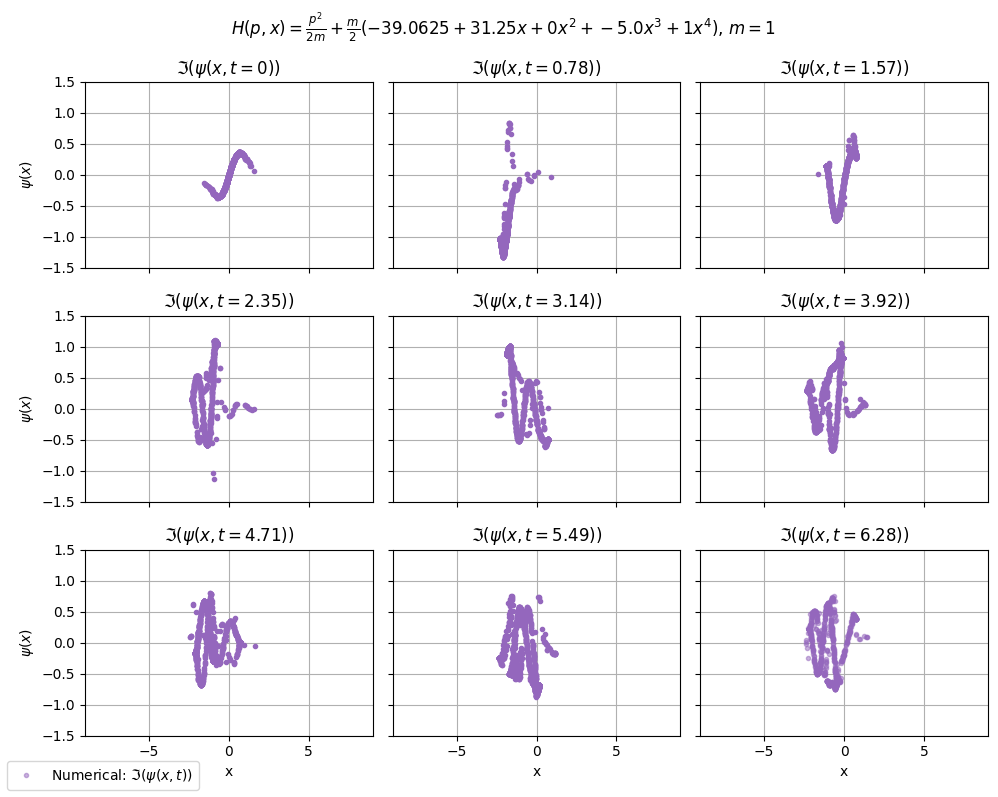

In [4]:
minimum_location = 2.5

a_4 = 1
a_3 = -2*minimum_location
a_2 = 0
a_1 = 2*minimum_location**3
a_0 = -minimum_location**4



fig = plt.figure(figsize=(10,8))
axes = [fig.add_subplot(3, 3, i+1) for i in range(9)]
t_points = np.array([0,0.74,1.2,1.5,2.3,2.86,3.7,4.51,5])/0.01
t_points = np.array([0.75*i for i in range(9)])/0.01
t_points = np.array([2*np.pi/8*i for i in range(9)])/0.01
for i in range(len(axes)-1):
    ax = axes[i]
    t = int(t_points[i])
    ax.set_ylabel(r'$\psi(x)$')
    ax.set_xlabel("x")
    ax.plot(deeper_welltrajectories[:,t], np.imag(deeper_wellpsi_WKB[t,:]),  '.', color ='tab:purple')
    ax.grid()
    if i ==0:
        ax.set_title(r'$\Im(\psi(x,t=0))$')
    else:
        ax.set_title(r'$\Im(\psi(x,t=' + f"{np.round(t*0.01, 2)}" + r'))$')
    #ax.legend()
    ax.set_ylim(-1.5,1.5)
    ax.set_xlim(-9,9)
    ax.label_outer()
    #main_feature = x_arr[np.argmax(abs(np.imag(psi_QM[:,t])))]
    #arrow_start = (-.9+main_feature,1.3)  
    #arrow_end = (.9+main_feature,1.3)
    #if i >=3 and i <6: 
    #    ax.annotate('', xy=arrow_start, xytext=arrow_end,
    #            arrowprops=dict(arrowstyle="->", color='blue', lw=1.6))
    #else:
    #    ax.annotate('', xy=arrow_end, xytext=arrow_start,
    #            arrowprops=dict(arrowstyle="->", color='blue', lw=1.6))
    
        

ax = axes[-1]
t = int(t_points[-1])
ax.set_ylabel(r'$\psi(x)$')
ax.set_xlabel("x")
ax.plot(deeper_welltrajectories[:,t], np.imag(deeper_wellpsi_WKB[t,:]),  '.', label = r'Numerical: $\Im(\psi(x,t))$', color ='tab:purple',alpha=0.5)
ax.grid()
#ax.legend()
ax.set_ylim(-1.5,1.5)
ax.set_xlim(-9,9)
ax.set_title(r'$\Im(\psi(x,t=' + f"{np.round(t*0.01, 2)}" + r'))$')
ax.label_outer()
#main_feature = x_arr[np.argmax(abs(np.imag(psi_QM[:,t])))]
#arrow_start = (-.9+main_feature,1.3)  
#arrow_end = (.9+main_feature,1.3)  
#ax.annotate('', xy=arrow_end, xytext=arrow_start,
#                arrowprops=dict(arrowstyle="->", color='blue', lw=1.6,label='Direction of Movement'))

fig.legend( loc='lower left')
fig.suptitle(r'$H(p,x) = \frac{p^2}{2m} + \frac{m}{2}(' + str(a_0) + ' + ' + str(a_1) + 'x + ' + str(a_2) + 'x^2 + ' + str(a_3) + 'x^3 + ' + str(a_4) + 'x^4) $, $m = 1$')

plt.tight_layout()

#plt.show()
plt.savefig("plots/deeper_well.png")

## ASHO

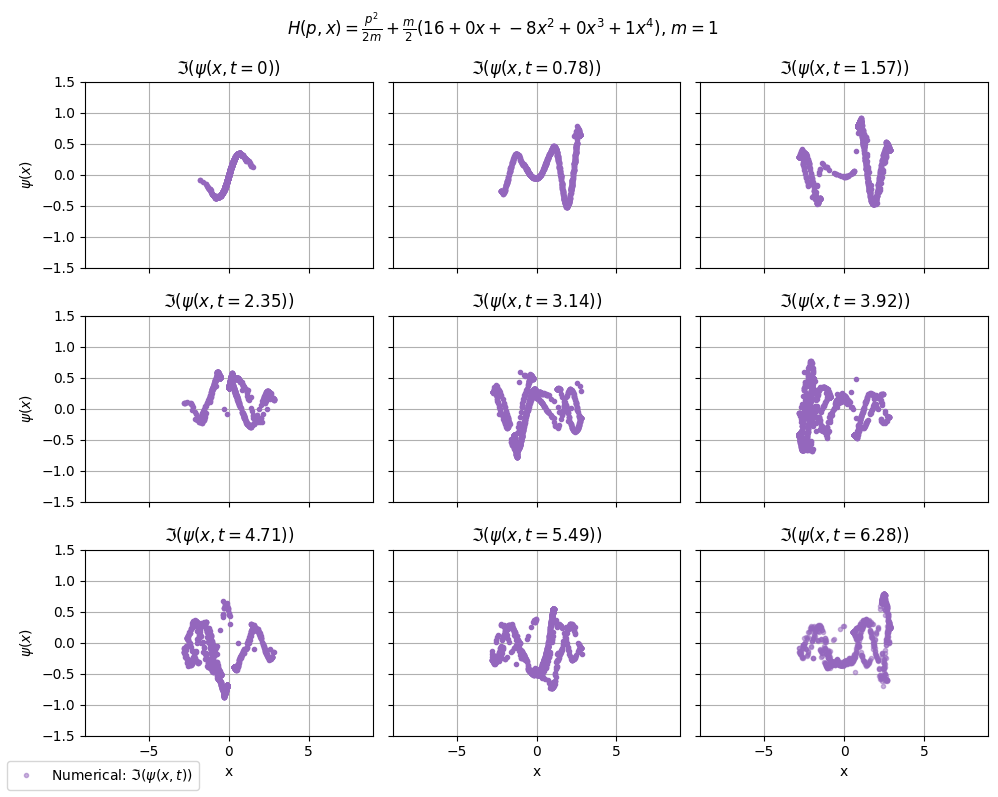

In [5]:
minimum_location = 2

a_4 = 1
a_2 = -2*minimum_location**2
a_1 = 0
a_3 = 0
a_0 = minimum_location**4



fig = plt.figure(figsize=(10,8))
axes = [fig.add_subplot(3, 3, i+1) for i in range(9)]
t_points = np.array([0,0.74,1.2,1.5,2.3,2.86,3.7,4.51,5])/0.01
t_points = np.array([0.75*i for i in range(9)])/0.01
t_points = np.array([2*np.pi/8*i for i in range(9)])/0.01
for i in range(len(axes)-1):
    ax = axes[i]
    t = int(t_points[i])
    ax.set_ylabel(r'$\psi(x)$')
    ax.set_xlabel("x")
    ax.plot(trajectoriesASHO[:,t], np.imag(ASHOpsi_WKB[t,:]),  '.', color ='tab:purple')
    ax.grid()
    if i ==0:
        ax.set_title(r'$\Im(\psi(x,t=0))$')
    else:
        ax.set_title(r'$\Im(\psi(x,t=' + f"{np.round(t*0.01, 2)}" + r'))$')
    #ax.legend()
    ax.set_ylim(-1.5,1.5)
    ax.set_xlim(-9,9)
    ax.label_outer()
    #main_feature = x_arr[np.argmax(abs(np.imag(psi_QM[:,t])))]
    #arrow_start = (-.9+main_feature,1.3)  
    #arrow_end = (.9+main_feature,1.3)
    #if i >=3 and i <6: 
    #    ax.annotate('', xy=arrow_start, xytext=arrow_end,
    #            arrowprops=dict(arrowstyle="->", color='blue', lw=1.6))
    #else:
    #    ax.annotate('', xy=arrow_end, xytext=arrow_start,
    #            arrowprops=dict(arrowstyle="->", color='blue', lw=1.6))
    
        

ax = axes[-1]
t = int(t_points[-1])
ax.set_ylabel(r'$\psi(x)$')
ax.set_xlabel("x")
ax.plot(trajectoriesASHO[:,t], np.imag(ASHOpsi_WKB[t,:]),  '.', label = r'Numerical: $\Im(\psi(x,t))$', color ='tab:purple',alpha=0.5)
ax.grid()
#ax.legend()
ax.set_ylim(-1.5,1.5)
ax.set_xlim(-9,9)
ax.set_title(r'$\Im(\psi(x,t=' + f"{np.round(t*0.01, 2)}" + r'))$')
ax.label_outer()
#main_feature = x_arr[np.argmax(abs(np.imag(psi_QM[:,t])))]
#arrow_start = (-.9+main_feature,1.3)  
#arrow_end = (.9+main_feature,1.3)  
#ax.annotate('', xy=arrow_end, xytext=arrow_start,
#                arrowprops=dict(arrowstyle="->", color='blue', lw=1.6,label='Direction of Movement'))

fig.legend( loc='lower left')
fig.suptitle(r'$H(p,x) = \frac{p^2}{2m} + \frac{m}{2}(' + str(a_0) + ' + ' + str(a_1) + 'x + ' + str(a_2) + 'x^2 + ' + str(a_3) + 'x^3 + ' + str(a_4) + 'x^4) $, $m = 1$')

plt.tight_layout()

#plt.show()
plt.savefig("plots/ASHO.png")

##  one zero

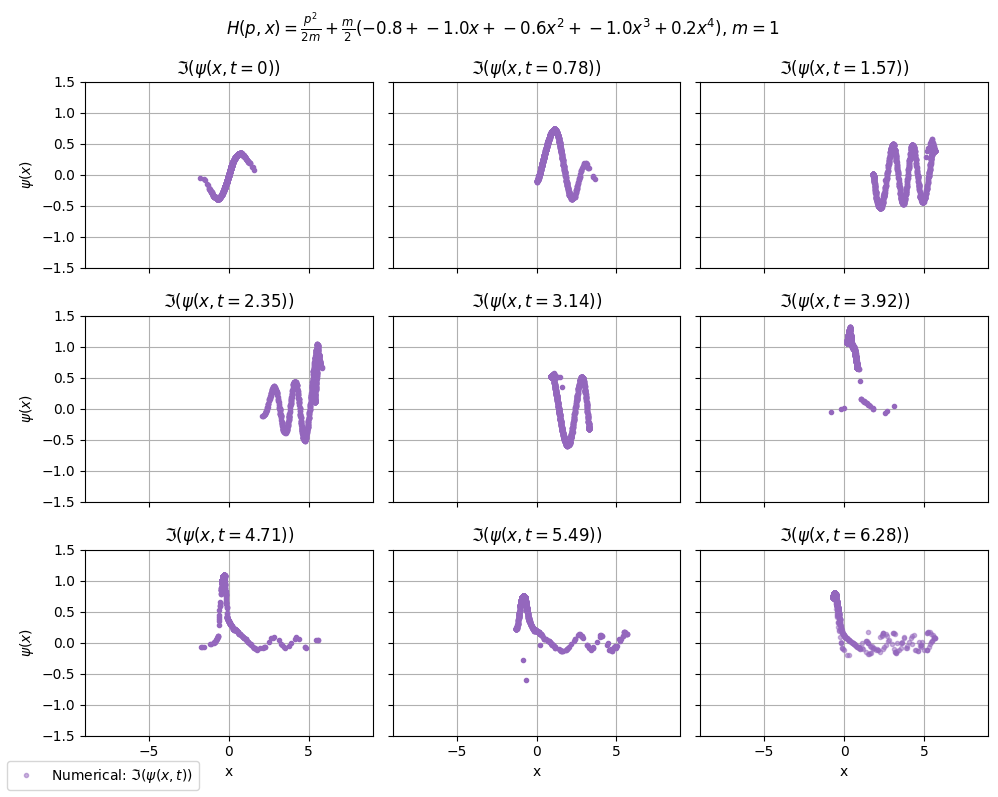

In [6]:
b = 30
c = 1600
m = -0
a_4 = 1*.2
a_3 = -5*.2
a_2 = -3*.2
a_1 = -5*.2
a_0 = -4*.2



fig = plt.figure(figsize=(10,8))
axes = [fig.add_subplot(3, 3, i+1) for i in range(9)]
t_points = np.array([0,0.74,1.2,1.5,2.3,2.86,3.7,4.51,5])/0.01
t_points = np.array([0.75*i for i in range(9)])/0.01
t_points = np.array([2*np.pi/8*i for i in range(9)])/0.01
for i in range(len(axes)-1):
    ax = axes[i]
    t = int(t_points[i])
    ax.set_ylabel(r'$\psi(x)$')
    ax.set_xlabel("x")
    ax.plot(one_zerotrajectories[:,t], np.imag(one_zeropsi_WKB[t,:]),  '.', color ='tab:purple')
    ax.grid()
    if i ==0:
        ax.set_title(r'$\Im(\psi(x,t=0))$')
    else:
        ax.set_title(r'$\Im(\psi(x,t=' + f"{np.round(t*0.01, 2)}" + r'))$')
    #ax.legend()
    ax.set_ylim(-1.5,1.5)
    ax.set_xlim(-9,9)
    ax.label_outer()
    #main_feature = x_arr[np.argmax(abs(np.imag(psi_QM[:,t])))]
    #arrow_start = (-.9+main_feature,1.3)  
    #arrow_end = (.9+main_feature,1.3)
    #if i >=3 and i <6: 
    #    ax.annotate('', xy=arrow_start, xytext=arrow_end,
    #            arrowprops=dict(arrowstyle="->", color='blue', lw=1.6))
    #else:
    #    ax.annotate('', xy=arrow_end, xytext=arrow_start,
    #            arrowprops=dict(arrowstyle="->", color='blue', lw=1.6))
    
        

ax = axes[-1]
t = int(t_points[-1])
ax.set_ylabel(r'$\psi(x)$')
ax.set_xlabel("x")
ax.plot(one_zerotrajectories[:,t], np.imag(one_zeropsi_WKB[t,:]),  '.', label = r'Numerical: $\Im(\psi(x,t))$', color ='tab:purple',alpha=0.5)
ax.grid()
#ax.legend()
ax.set_ylim(-1.5,1.5)
ax.set_xlim(-9,9)
ax.set_title(r'$\Im(\psi(x,t=' + f"{np.round(t*0.01, 2)}" + r'))$')
ax.label_outer()
#main_feature = x_arr[np.argmax(abs(np.imag(psi_QM[:,t])))]
#arrow_start = (-.9+main_feature,1.3)  
#arrow_end = (.9+main_feature,1.3)  
#ax.annotate('', xy=arrow_end, xytext=arrow_start,
#                arrowprops=dict(arrowstyle="->", color='blue', lw=1.6,label='Direction of Movement'))

fig.legend( loc='lower left')
fig.suptitle(r'$H(p,x) = \frac{p^2}{2m} + \frac{m}{2}(' + str(np.round(a_0,2)) + ' + ' + str(np.round(a_1,2)) + 'x + ' + str(np.round(a_2,2)) + 'x^2 + ' + str(a_3) + 'x^3 + ' + str(a_4) + 'x^4) $, $m = 1$')

plt.tight_layout()

#plt.show()
plt.savefig("plots/one_zero.png")

In [7]:
def V_ASHO():
    q = np.linspace(-3,3,1000)
    m=1
    minimum_location = 2
    a_4 = 1
    a_2 = -2*minimum_location**2
    a_1 = 0
    a_3 = 0
    a_0 = minimum_location**4
    y =  1/2*m*(a_0 + a_1*q + a_2*q**2 + a_3*q**3 + a_4*q**4)
    plt.plot(x, y)
    plt.tight_layout()
    plt.xlabel(r'$x$')
    plt.ylabel(r'$V(x)$')
    plt.title(r'$V(x)= \frac{m}{2}(' + str(np.round(a_0,2)) + ' + ' + str(np.round(a_1,2)) + 'x + ' + str(np.round(a_2,2)) + 'x^2 + ' + str(a_3) + 'x^3 + ' + str(a_4) + 'x^4) $, $m = 1$')
    plt.grid()
    plt.savefig("plots/potASHO.pdf", bbox_inches='tight')
    return
def V_onezero():
    q = np.linspace(-3,6,1000)
    b = 30
    c = 1600
    m = 1
    a_4 = 1*.2
    a_3 = -5*.2
    a_2 = -3*.2
    a_1 = -5*.2
    a_0 = -4*.2
    y =  1/2*m*(a_0 + a_1*q + a_2*q**2 + a_3*q**3 + a_4*q**4)
    plt.plot(x, y)
    plt.tight_layout()
    plt.xlabel(r'$x$')
    plt.ylabel(r'$V(x)$')
    plt.title(r'$V(x)= \frac{m}{2}(' + str(np.round(a_0,2)) + ' + ' + str(np.round(a_1,2)) + 'x + ' + str(np.round(a_2,2)) + 'x^2 + ' + str(a_3) + 'x^3 + ' + str(a_4) + 'x^4) $, $m = 1$')
    plt.grid()
    plt.savefig("plots/potonezero.pdf", bbox_inches='tight')
    return
def V_deeper_well():
    q = np.linspace(-3,3,1000)
    m=1
    minimum_location = 2.5
    a_4 = 1
    a_3 = -2*minimum_location
    a_2 = 0
    a_1 = 2*minimum_location**3
    a_0 = -minimum_location**4
    y = 1/2*m*(a_0 + a_1*q + a_2*q**2 + a_3*q**3 + a_4*q**4)
    plt.plot(x, y)
    plt.tight_layout()
    plt.xlabel(r'$x$')
    plt.ylabel(r'$V(x)$')
    plt.title(r'$V(x)=\frac{m}{2}(' + str(np.round(a_0,2)) + ' + ' + str(np.round(a_1,2)) + 'x + ' + str(np.round(a_2,2)) + 'x^2 + ' + str(a_3) + 'x^3 + ' + str(a_4) + 'x^4) $, $m = 1$')
    plt.grid()
    plt.show()
    return

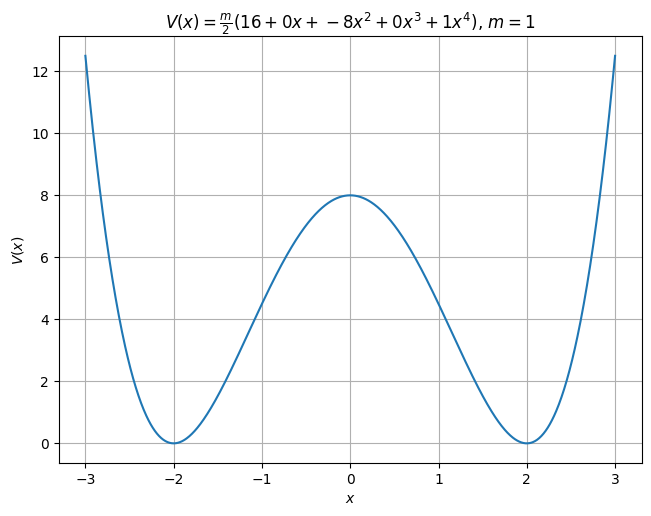

In [47]:
V_ASHO()



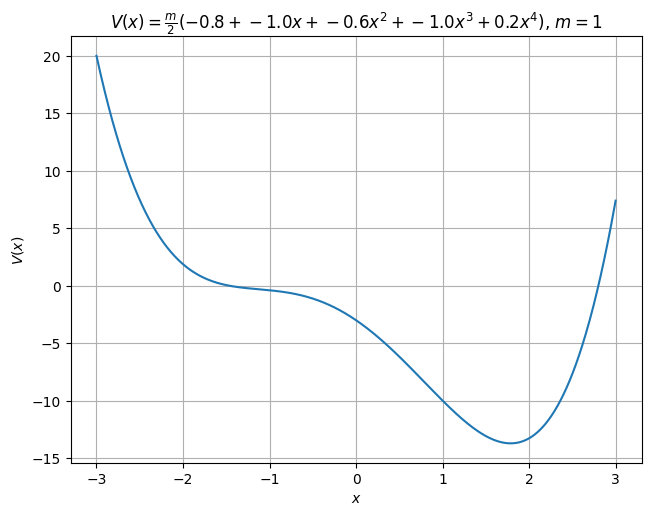

In [48]:
V_onezero()